In [1]:
#import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import csv
import os
import pprint
from datetime import datetime
from pprint import pprint
import time
import json

In [ ]:
#pip install tweepy - Installed on the computer

### Gather Data

> We'll first start with gathering the data from various sources and load it into corresponding Dataframes.

In [4]:
#Create connection to the Twitter database
import tweepy

consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


In [5]:
time.time()

1592917328.8281593

In [2]:
#Read the Twitter archived Enhanced csv file


os.chdir("C:\\Users\\skhemka013\\Documents\\Udacity\\Data Analytics\\Project 3\\Raw data")
df_twitterarchived = pd.read_csv('twitter-archive-enhanced.csv')
df_twitterarchived.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
# Read the JSON extract to a CSV 

from timeit import default_timer as timer

start = time.time()
tweet_ids = df_twitterarchived.tweet_id.values
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Fail
1045: 743609206067040256
Fail
1046: 743595368194129920
Fail
1047: 743545585370791937
Fail
1048: 743510151680958465
Fail
1049: 743253157753532416
Fail
1050: 743222593470234624
Fail
1051: 743210557239623680
Fail
1052: 742534281772302336
Fail
1053: 742528092657332225
Fail
1054: 742465774154047488
Fail
1055: 742423170473463808
Fail
1056: 742385895052087300
Fail
1057: 742161199639494656
Fail
1058: 742150209887731712
Fail
1059: 741793263812808706
Fail
1060: 741743634094141440
Fail
1061: 741438259667034112
Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
Fail
1073: 739979191639244800
Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078:

Fail
1320: 706516534877929472
Fail
1321: 706346369204748288
Fail
1322: 706310011488698368
Fail
1323: 706291001778950144
Fail
1324: 706265994973601792
Fail
1325: 706169069255446529
Fail
1326: 706166467411222528
Fail
1327: 706153300320784384
Fail
1328: 705975130514706432
Fail
1329: 705970349788291072
Fail
1330: 705898680587526145
Fail
1331: 705786532653883392
Fail
1332: 705591895322394625
Fail
1333: 705475953783398401
Fail
1334: 705442520700944385
Fail
1335: 705428427625635840
Fail
1336: 705239209544720384
Fail
1337: 705223444686888960
Fail
1338: 705102439679201280
Fail
1339: 705066031337840642
Fail
1340: 704871453724954624
Fail
1341: 704859558691414016
Fail
1342: 704847917308362754
Fail
1343: 704819833553219584
Fail
1344: 704761120771465216
Fail
1345: 704499785726889984
Fail
1346: 704491224099647488
Fail
1347: 704480331685040129
Fail
1348: 704364645503647744
Fail
1349: 704347321748819968
Fail
1350: 704134088924532736
Fail
1351: 704113298707505153
Fail
1352: 704054845121142784
Fail
1353:

KeyboardInterrupt: 

In [3]:
# Get the tsv file using Requests

import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(r.content)


335079

In [5]:
# Convert to df
df_imagepredictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
df_imagepredictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
#Create df
df_tweetdetail = pd.read_json('tweet-json2.txt', lines=True)
df_tweetdetail

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [8]:
df_twitterarchived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
df_tweetdetail

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Quality issues

> 1. There are alot of retweets which would add redundancy in the dataframes. Needs to be removed.
> 2. There are some ratings_numerator values which are obnoxiously higher. Outliers need to be removed. 
> 3. There are some ratings_denominator values which are not equal to 10. According to our page metric, everyone's supposed to rate the dogs with the denominator being 10.
> 4. Drop the columns that have retweet details. We don't need them here. 
> 5. Check for any redundant values of the tweet ids and remove the duplicates, if any.
> 6. Remove names that are not valid (Ex: a,an,the, None, quite).
> 7. Check if all tweets have all the digits required to be a valid tweet
> 8. Identify the id and id_str that don't match in the table.
> 9. Remove all the reply to status/ids from the table.

#### Tidiness issues
> 1. Drop the columns that have retweet details. We don't need them here. 
> 2. Move the Tweet URL link from the Text column.
> 3. Add a suffix infront of the individual tables before joining

### Assess Data

> Now we'll assess the data present in the dataframe. We'll start with visual assessment and move onto programmatic assessment. 
We'll make a copy of the original dataframe inorder to retain the original values once we start altering the dataframes values.


In [10]:
#Copy the dataframe

df_twitterarchived_clean = df_twitterarchived.copy()
#df_twitterarchived_clean[df_twitterarchived_clean['doggo'] == None]

#df_twitterarchived_clean = np.array(map(lambda x: numpy.nan if df_twitterarchived_clean['doggo']==None else x, df_twitterarchived_clean))


> 1. There are alot of retweets which would add redundancy in the dataframes. Needs to be removed.

In [11]:
#remove retweets

df_twitterarchived_clean=df_twitterarchived_clean[df_twitterarchived_clean['retweeted_status_id']!= df_twitterarchived_clean['retweeted_status_id'] ]



> 2. There are some ratings_numerator values which are obnoxiously higher. Outliers need to be removed.

In [ ]:

df_twitterarchived_clean = df_twitterarchived_clean[df_twitterarchived_clean['rating_numerator']<20]


> 3. There are some ratings_denominator values which are not equal to 10. According to our page metric, everyone's supposed to rate the dogs with the denominator being 10.

In [ ]:
df_twitterarchived_clean =df_twitterarchived_clean[df_twitterarchived_clean['rating_denominator']==10]

In [12]:
df_twitterarchived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2145 non-null int64
in_reply_to_status_id         70 non-null float64
in_reply_to_user_id           70 non-null float64
timestamp                     2145 non-null object
source                        2145 non-null object
text                          2145 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2145 non-null int64
rating_denominator            2145 non-null int64
name                          2145 non-null object
doggo                         2145 non-null object
floofer                       2145 non-null object
pupper                        2145 non-null object
puppo                         2145 non-null object
dtypes: float64(4), int64(3), object(1

> 4. Drop the columns that have retweet details. We don't need them here. 

In [13]:
df_twitterarchived_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis =1, inplace=True)

In [14]:
df_twitterarchived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2145 non-null int64
in_reply_to_status_id    70 non-null float64
in_reply_to_user_id      70 non-null float64
timestamp                2145 non-null object
source                   2145 non-null object
text                     2145 non-null object
expanded_urls            2094 non-null object
rating_numerator         2145 non-null int64
rating_denominator       2145 non-null int64
name                     2145 non-null object
doggo                    2145 non-null object
floofer                  2145 non-null object
pupper                   2145 non-null object
puppo                    2145 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 251.4+ KB


> 5. Check for any redundant values of the tweet ids and remove the duplicates, if any.

In [15]:
#Ensure that there is no tweet id which has been repeated
df_twitterarchived_clean['tweet_id'].value_counts().sort_index()

666020888022790149    1
666029285002620928    1
666033412701032449    1
666044226329800704    1
666049248165822465    1
                     ..
891327558926688256    1
891689557279858688    1
891815181378084864    1
892177421306343426    1
892420643555336193    1
Name: tweet_id, Length: 2145, dtype: int64

In [16]:
# Move the Tweet URL link from the Text column.

#def substring_start(value):
    

#for     
#substring_start()

#dftemp=df_twitterarchived_clean['text'].str[df_twitterarchived_clean['text'].str.find('http',1,-1):-1]
dftemp=df_twitterarchived_clean['text'].str.find('http',1,-1)

dftemp

0        86
1       139
2       122
3        80
4       139
       ... 
2351     97
2352    114
2353    107
2354    116
2355    108
Name: text, Length: 2145, dtype: int64

In [17]:
#df_twitterarchived_clean['text'][(lambda x: dftemp[x]):-1]

In [ ]:
#Clean the text row and move the URL to another column

#df_twitterarchived_clean['extracted URL']  
for row in range(0,1000):
    try:
        df_twitterarchived_clean['extracted URL'].iloc[row] = df_twitterarchived_clean['text'][row][dftemp[row].tolist():-1]
        #df_twitterarchived_clean['text'][row] = df_twitterarchived_clean['text'][row][0:dftemp[row]-1]
        print(row)
        print(temp)
    except:
        print('er')
        pass


In [ ]:
#df_twitterarchived_clean['extracted URL'] = df_twitterarchived_clean['text'][dftemp.tolist():-1]

In [18]:
df_twitterarchived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2145 non-null int64
in_reply_to_status_id    70 non-null float64
in_reply_to_user_id      70 non-null float64
timestamp                2145 non-null object
source                   2145 non-null object
text                     2145 non-null object
expanded_urls            2094 non-null object
rating_numerator         2145 non-null int64
rating_denominator       2145 non-null int64
name                     2145 non-null object
doggo                    2145 non-null object
floofer                  2145 non-null object
pupper                   2145 non-null object
puppo                    2145 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 251.4+ KB


In [19]:
#df_twitterarchived_clean.iloc[17]
df_twitterarchived_clean['text'][7]


"When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq"

> 6. Remove names that are not valid (Ex: a,an,the, None, quite).

In [20]:
#Replace meaningless names with None

df_twitterarchived_clean['name'].replace('a', 'None', inplace=True)
df_twitterarchived_clean['name'].replace('None', 'None', inplace=True)
df_twitterarchived_clean['name'].replace('an', 'None', inplace=True)
df_twitterarchived_clean['name'].replace('quite', 'None', inplace=True)
df_twitterarchived_clean['name'].replace('the', 'None', inplace=True)

In [21]:
[print(a) for a in df_twitterarchived_clean['name'].value_counts().index]

None
Charlie
Lucy
Cooper
Oliver
Penny
Tucker
Winston
Lola
Sadie
Toby
Daisy
Stanley
Jax
Bo
Koda
Oscar
Bella
Bailey
Buddy
Leo
Chester
Dave
Rusty
Bentley
Louis
Milo
Scout
Oakley
George
Sammy
Archie
Duke
Alfie
Clarence
Phil
Scooter
Jack
one
Chip
Boomer
Gus
Maggie
Dexter
Reggie
Clark
Cassie
Gary
Larry
Jeffrey
Bear
very
Jerry
Finn
Winnie
Brody
Derek
Moose
Shadow
Zeke
Beau
Rosie
Wallace
Nala
Malcolm
Riley
Vincent
Mia
Olive
Carl
Ruby
Waffles
Sophie
Calvin
Wilson
Maximus
Lily
Hank
Zoey
Bruce
Kyle
Ellie
Earl
Gerald
Klevin
Steven
Sebastian
Otis
Samson
Ted
Reese
Loki
Reginald
Max
Doug
Walter
Jimothy
Luna
just
Gizmo
Sunny
Wyatt
Louie
Lincoln
Hobbes
Sampson
Patrick
Hammond
Bernie
Bob
Indie
Neptune
Peaches
Axel
Percy
Chuckles
Jeph
Titan
Kenneth
Sarge
Fiona
Raymond
Layla
Paisley
getting
Franklin
Harold
Ava
Sansa
Ollie
Cody
Albus
Fred
Thumas
Oshie
Misty
Coco
Lorenzo
Hunter
Aspen
Griffin
Colby
Smokey
Benji
Moe
Eli
Phred
Dakota
Frankie
Jimison
Rocco
Phineas
Rocky
Curtis
Alice
Olivia
Charles
Oliviér
Ash
B

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [22]:
df_twitterarchived_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2145, dtype: object

In [23]:
(df_twitterarchived_clean['name']==None).sum()

0

In [25]:
df_twitterarchived_clean['name'][df_twitterarchived_clean['name'] == 'None'].isna().sum()

0

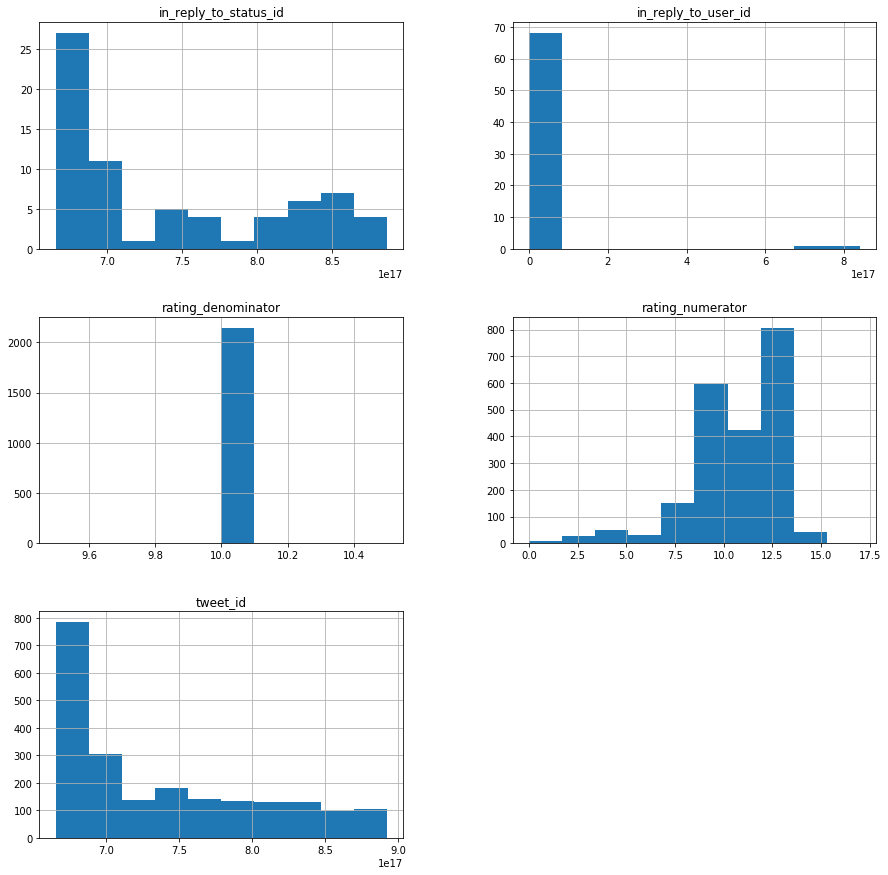

In [26]:
# Display the histograms for the various variables in table

df_twitterarchived_clean.hist(figsize= (15,15));

In [27]:
df_twitterarchived_clean['doggo'].isna().sum()

0

In [ ]:

#print(df_twitterarchived_clean.columns[0:-4])
#df_twitterarchived_clean= pd.melt(df_twitterarchived_clean, id_vars = [df_twitterarchived_clean.columns[0:-4].tolist()], var_name= 'Dog Types', value_name = 'Anwer')

                            

### 2nd Table - df_imagepredictions


In [28]:
#Copy the df to another df for cleaning
df_imagepredictions_clean = df_imagepredictions.copy()
df_imagepredictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [29]:
df_imagepredictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
df_imagepredictions_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> 7. Check if all tweets have all the digits required to be a valid tweet


In [31]:
df_imagepredictions_clean['tweet_id'].astype(str).map(len).value_counts()

18    2075
Name: tweet_id, dtype: int64

In [32]:
df_imagepredictions_clean['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
816829038950027264    1
847971574464610304    1
713175907180089344    1
670338931251150849    1
700151421916807169    1
Name: tweet_id, Length: 2075, dtype: int64

In [33]:
df_imagepredictions_clean[df_imagepredictions_clean['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [34]:
df_tweetdetail_clean = df_tweetdetail.copy()

In [35]:
df_tweetdetail_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [36]:
df_tweetdetail_clean.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [37]:
df_tweetdetail_clean.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


> 8. Identify the id and id_str that don't match in the table.

In [38]:
#Not every id and id_str are of the same value 

df_tweetdetail_clean[df_tweetdetail_clean['id'] != df_tweetdetail_clean['id_str']]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
6,2017-07-28 16:27:12+00:00,890971913173991426,890971913173991424,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12041,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
9,2017-07-26 15:59:51+00:00,890240255349198849,890240255349198848,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,32467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
11,2017-07-25 16:11:53+00:00,889880896479866881,889880896479866880,This is Bruno. He is a service shark. Only get...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 889880888800096258, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,28268,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,2015-11-16 00:49:46+00:00,666055525042405380,666055525042405376,Here is a Siberian heavily armored polar bear ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666055517517848576, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,448,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2348,2015-11-16 00:30:50+00:00,666050758794694657,666050758794694656,This is a truly beautiful English Wilson Staff...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666050754986266625, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,136,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


> 9. Remove all the reply to status/ids from the table.

In [39]:
df_tweetdetail_clean = df_tweetdetail_clean[df_tweetdetail_clean['in_reply_to_status_id']!=df_tweetdetail_clean['in_reply_to_status_id']]
df_tweetdetail_clean = df_tweetdetail_clean[df_tweetdetail_clean['in_reply_to_status_id_str']!=df_tweetdetail_clean['in_reply_to_status_id_str']]
df_tweetdetail_clean = df_tweetdetail_clean[df_tweetdetail_clean['in_reply_to_user_id']!=df_tweetdetail_clean['in_reply_to_user_id']]
df_tweetdetail_clean = df_tweetdetail_clean[df_tweetdetail_clean['in_reply_to_user_id_str']!=df_tweetdetail_clean['in_reply_to_user_id_str']]

> Drop the columns that have retweet details. We don't need them here.

In [40]:
df_tweetdetail_clean[['id','id_str','full_text']]

,id,id_str,full_text
0,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....
2,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...
...,...,...,...
2349,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...
2350,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...
2351,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...
2352,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...


In [41]:
df_tweetdetail_clean = df_tweetdetail_clean.drop(['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo','coordinates','place','contributors'], axis=1)

In [47]:
df_tweetdetail_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276 entries, 0 to 2353
Data columns (total 22 columns):
created_at                       2276 non-null datetime64[ns, UTC]
id                               2276 non-null int64
id_str                           2276 non-null int64
full_text                        2276 non-null object
truncated                        2276 non-null bool
display_text_range               2276 non-null object
entities                         2276 non-null object
extended_entities                2050 non-null object
source                           2276 non-null object
user                             2276 non-null object
is_quote_status                  2276 non-null bool
retweet_count                    2276 non-null int64
favorite_count                   2276 non-null int64
favorited                        2276 non-null bool
retweeted                        2276 non-null bool
possibly_sensitive               2188 non-null float64
possibly_sensitive_appealab

> Add a suffix infront of the individual tables before joining

In [48]:
df_tweetdetail_clean.columns = [str(col) + '_x' for col in df_tweetdetail_clean.columns]
df_twitterarchived_clean.columns = [str(col) + '_y' for col in df_twitterarchived_clean.columns]
df_imagepredictions_clean.columns = [str(col) + '_z' for col in df_imagepredictions_clean.columns]

In [49]:
df_tweetdetail_clean

,created_at_x,id_x,id_str_x,full_text_x,truncated_x,display_text_range_x,entities_x,extended_entities_x,source_x,user_x,...,favorite_count_x,favorited_x,retweeted_x,possibly_sensitive_x,possibly_sensitive_appealable_x,lang_x,retweeted_status_x,quoted_status_id_x,quoted_status_id_str_x,quoted_status_x
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [51]:
result = pd.merge(df_tweetdetail_clean,df_twitterarchived_clean, left_on='id_x',right_on='tweet_id_y', how='left')

In [52]:
result

,created_at_x,id_x,id_str_x,full_text_x,truncated_x,display_text_range_x,entities_x,extended_entities_x,source_x,user_x,...,source_y,text_y,expanded_urls_y,rating_numerator_y,rating_denominator_y,name_y,doggo_y,floofer_y,pupper_y,puppo_y
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,None,None,None,None
2272,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to N

### Analyze Data

In [53]:
result3 = pd.merge(result,df_imagepredictions_clean, left_on='id_x',right_on='tweet_id_z', how='left')

In [54]:
result3

,created_at_x,id_x,id_str_x,full_text_x,truncated_x,display_text_range_x,entities_x,extended_entities_x,source_x,user_x,...,img_num_z,p1_z,p1_conf_z,p1_dog_z,p2_z,p2_conf_z,p2_dog_z,p3_z,p3_conf_z,p3_dog_z
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2272,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2273,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2274,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitt

In [55]:
result3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276 entries, 0 to 2275
Data columns (total 48 columns):
created_at_x                       2276 non-null datetime64[ns, UTC]
id_x                               2276 non-null int64
id_str_x                           2276 non-null int64
full_text_x                        2276 non-null object
truncated_x                        2276 non-null bool
display_text_range_x               2276 non-null object
entities_x                         2276 non-null object
extended_entities_x                2050 non-null object
source_x                           2276 non-null object
user_x                             2276 non-null object
is_quote_status_x                  2276 non-null bool
retweet_count_x                    2276 non-null int64
favorite_count_x                   2276 non-null int64
favorited_x                        2276 non-null bool
retweeted_x                        2276 non-null bool
possibly_sensitive_x               2188 non-null flo

In [60]:
#result3.to_csv('twitter_archive_master.csv')

Number of sources - source_x
What is the most famoust tweet - by retweet count and favourity count.
top rating tweets by rating numerator - self rating
correlation between self rating and other liking to the picture
the top prediction of the of only the true names of dogs


In [61]:
df_twitter_archive_master = result3.copy()

In [1]:
objects = df_twitter_archive_master['source_x'].value_count()
print(objects)

NameError: name 'df_twitter_archive_master' is not defined

In [87]:
objects =df_twitter_archive_master['source_x'].value_counts().index.tolist()

In [118]:
objects

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

In [99]:
mean_likes = [0,1,2,3]

mean_likes[0] = df_twitter_archive_master['favorite_count_x'][df_twitter_archive_master['source_x'] == objects[0]].mean()
mean_likes[1] = df_twitter_archive_master['favorite_count_x'][df_twitter_archive_master['source_x'] == objects[1]].mean()
mean_likes[2] = df_twitter_archive_master['favorite_count_x'][df_twitter_archive_master['source_x'] == objects[2]].mean()
mean_likes[3] = df_twitter_archive_master['favorite_count_x'][df_twitter_archive_master['source_x'] == objects[3]].mean()

In [101]:
mean_likes


[8344.465670247548, 7969.527472527472, 5408.939393939394, 5793.545454545455]

No handles with labels found to put in legend.


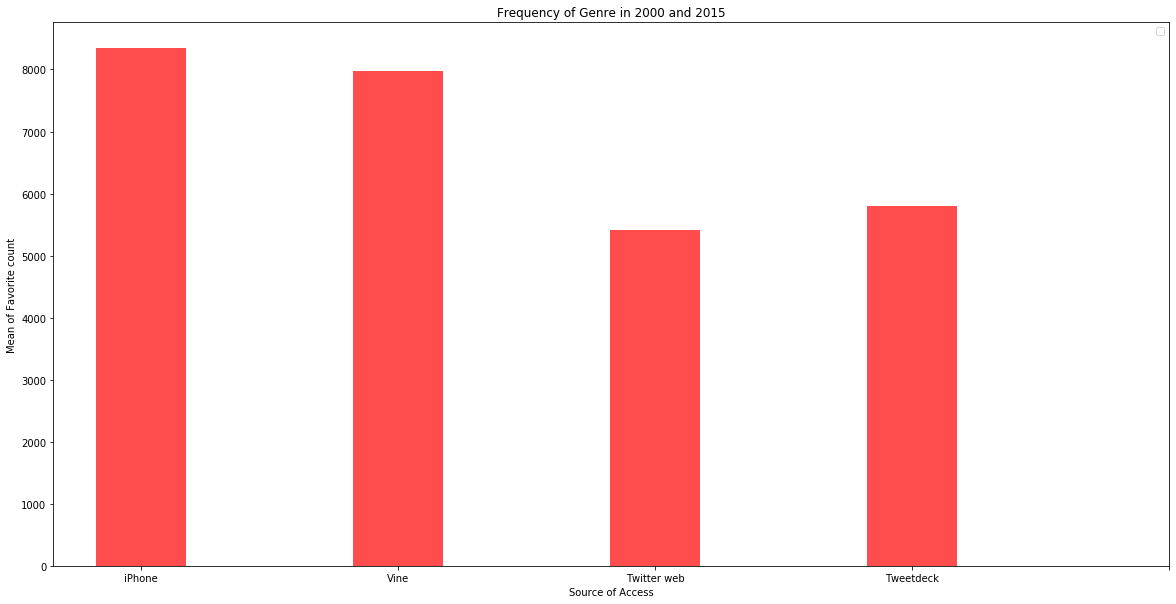

In [119]:
#labels = objects
#ind = np.arange(len(df_2015))
ae=[1,2,3,4]
width=.35
red_bars = plt.bar(objects, mean_likes,width, color='r', alpha=.7)
plt.ylabel('Mean of Favorite count')
plt.xlabel('Source of Access')
plt.title('Frequency of Genre in 2000 and 2015')
labels = ae
plt.rcParams["figure.figsize"] = (20,10)
plt.xticks(np.arange(5),['iPhone','Vine','Twitter web', 'Tweetdeck'])

plt.legend();


In [128]:
df_twitter_archive_master['full_text_x'].iloc[df_twitter_archive_master['retweet_count_x'].idxmax(axis =1)]

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

In [130]:
df_twitter_archive_master['full_text_x'].iloc[df_twitter_archive_master['favorite_count_x'].idxmax(axis =1)]

"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"

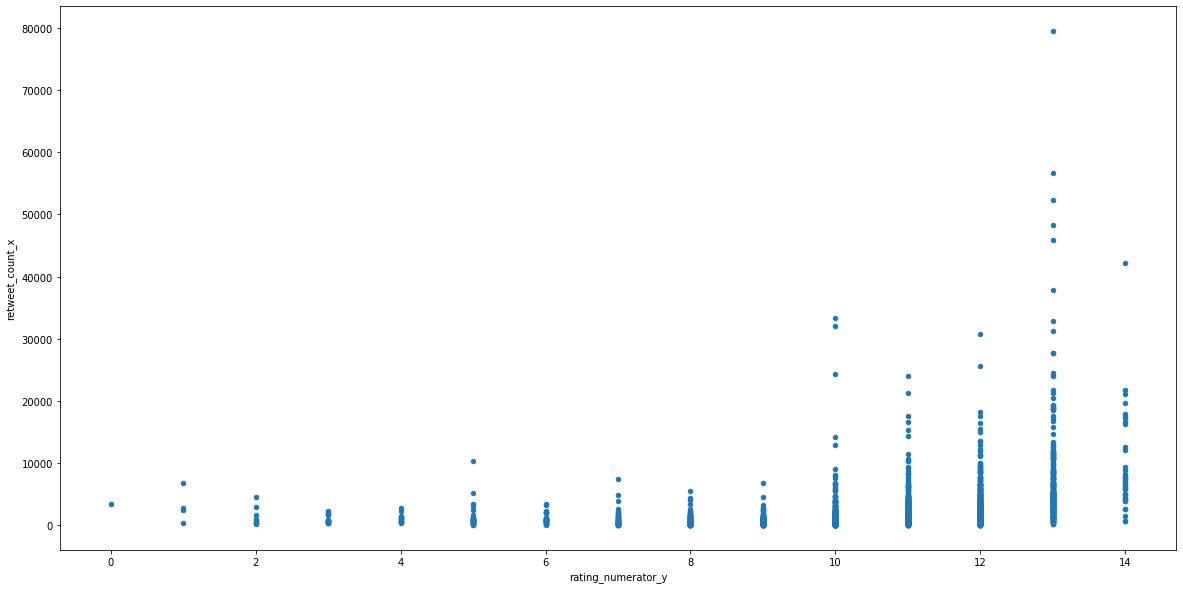

In [132]:
df_twitter_archive_master.plot(x='rating_numerator_y', y='retweet_count_x', kind='scatter');

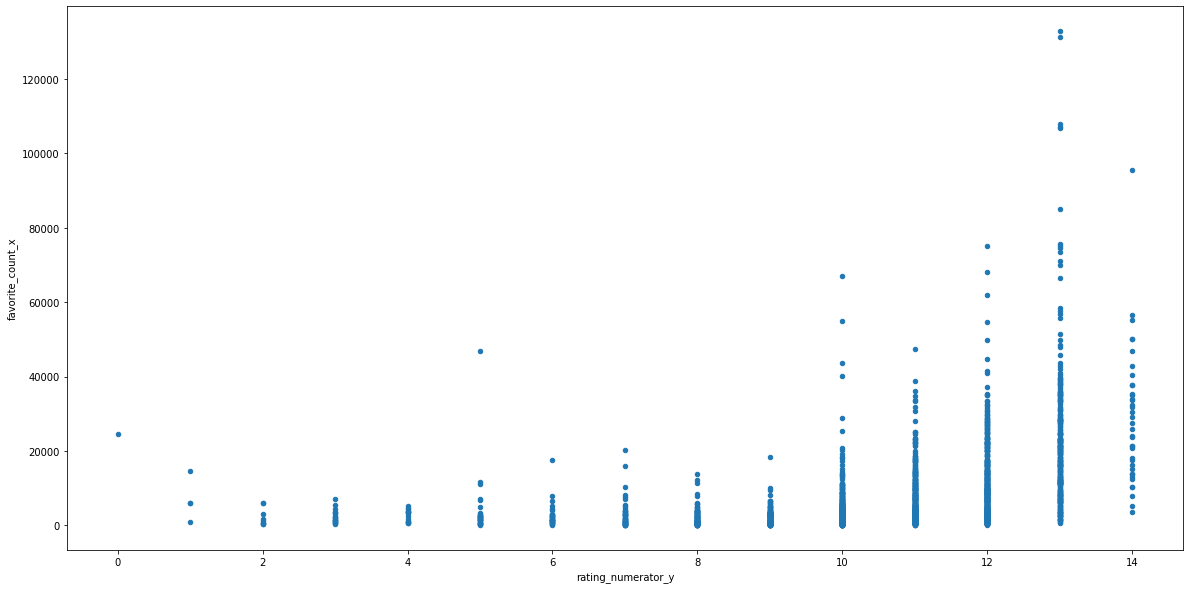

In [134]:
df_twitter_archive_master.plot(x='rating_numerator_y', y='favorite_count_x', kind='scatter');